In [1]:
import pandas as pd

1.	Load the Dataset
    - Read the CSV file into a pandas DataFrame
    - Check for missing values and data types.


In [3]:
customer_df = pd.read_csv("Mall_Customers.csv")
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# checking for null values
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**There are no missing values**

In [6]:
# checking for data consistency
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# making the customerID the index column
customer_df.set_index("CustomerID", inplace=True)

In [8]:
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


2. Explore the Data
    - Summary statistics: `.describe()`
    - Visualize distributions of Age, Annual Income, and Spending Score.
    - Optional: Visualize Gender vs Spending Score using a boxplot.


In [10]:
customer_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


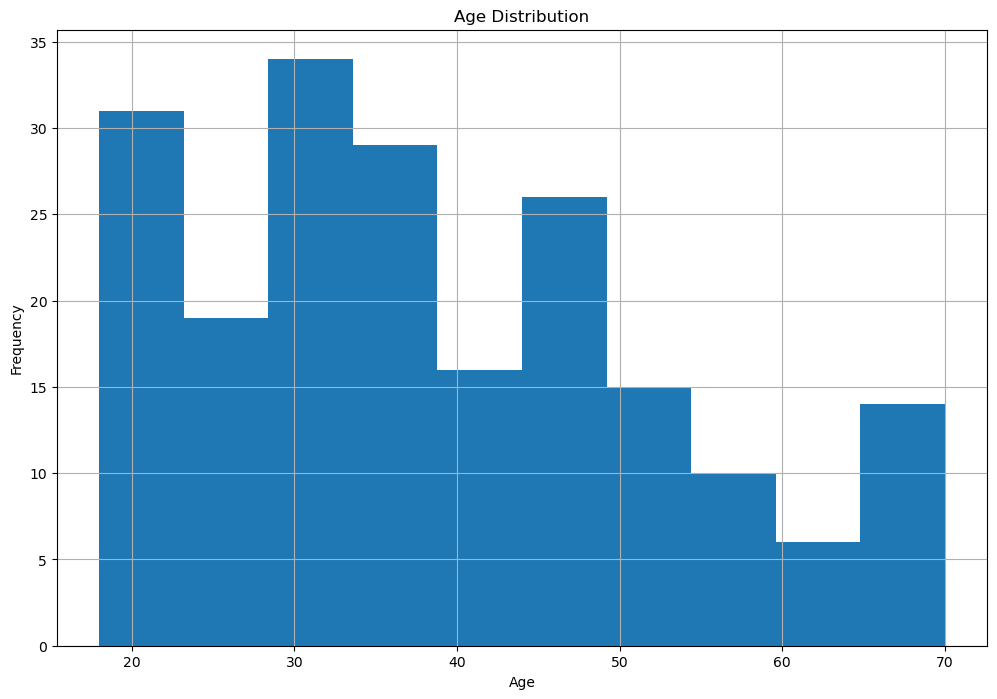

In [11]:
import matplotlib.pyplot as plt

# Ploting Age Distribution
plt.figure(figsize=(12, 8))
plt.hist(customer_df["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.grid(True)
plt.show()

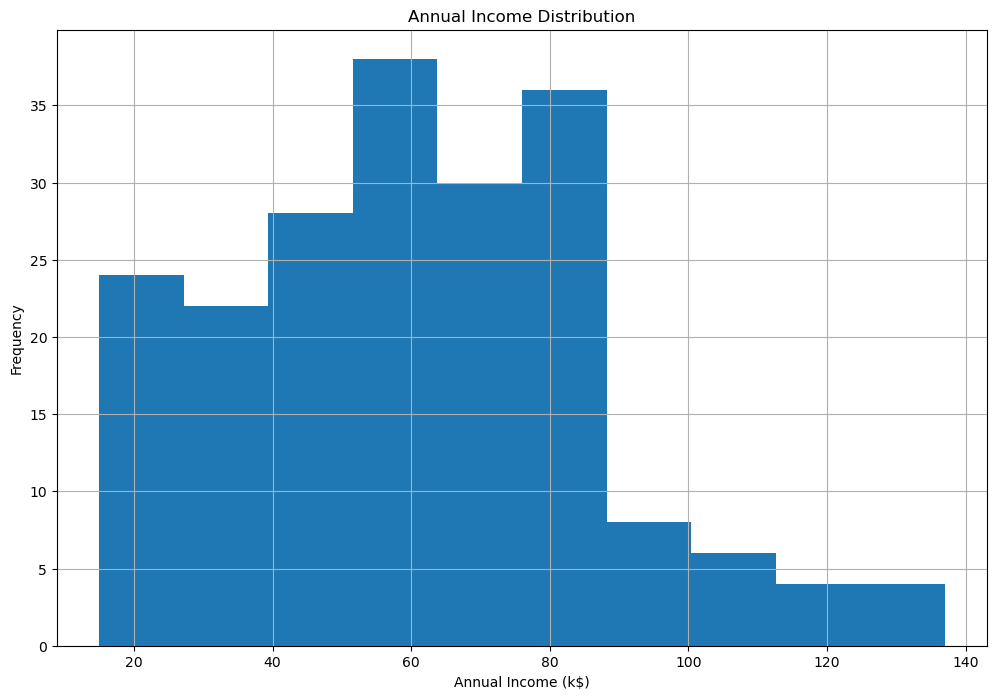

In [12]:
#Plotting Annual Income Distribution
plt.figure(figsize=(12, 8))
plt.hist(customer_df["Annual Income (k$)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.title("Annual Income Distribution")
plt.grid(True)
plt.show()

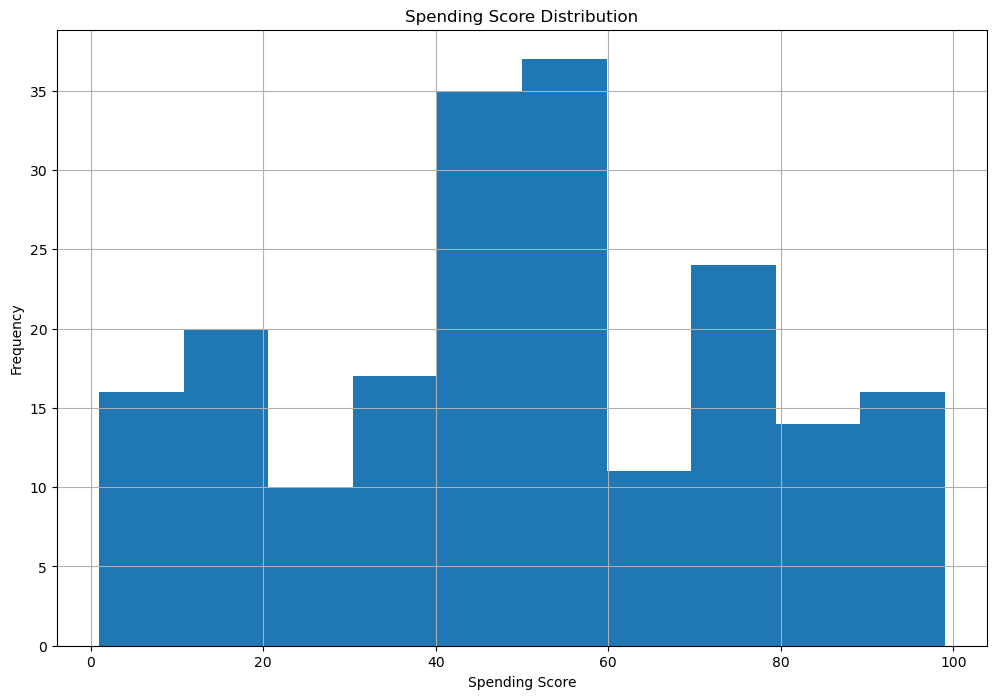

In [13]:
# Plotting Customers Spending score distribution
plt.figure(figsize=(12, 8))
plt.hist(customer_df["Spending Score (1-100)"])
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.title("Spending Score Distribution")
plt.grid(True)
plt.show()

In [14]:
import seaborn as sns

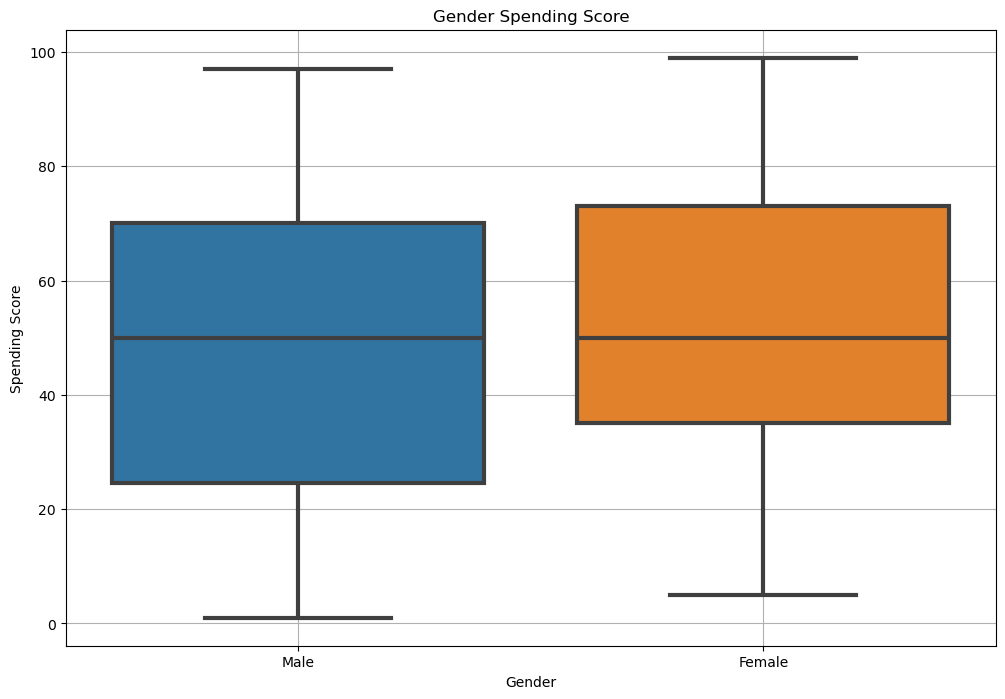

In [15]:
# Gender Spending Score Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(customer_df, x= "Gender", y="Spending Score (1-100)", hue="Gender", linewidth=3)
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.title("Gender Spending Score")
plt.grid(True)
plt.show()

3. Select Features for Clustering
    - Start simple: Annual Income (k$) and Spending Score (1-100).


In [17]:
clustering_df = customer_df[["Annual Income (k$)", "Spending Score (1-100)"]]

clustering_df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


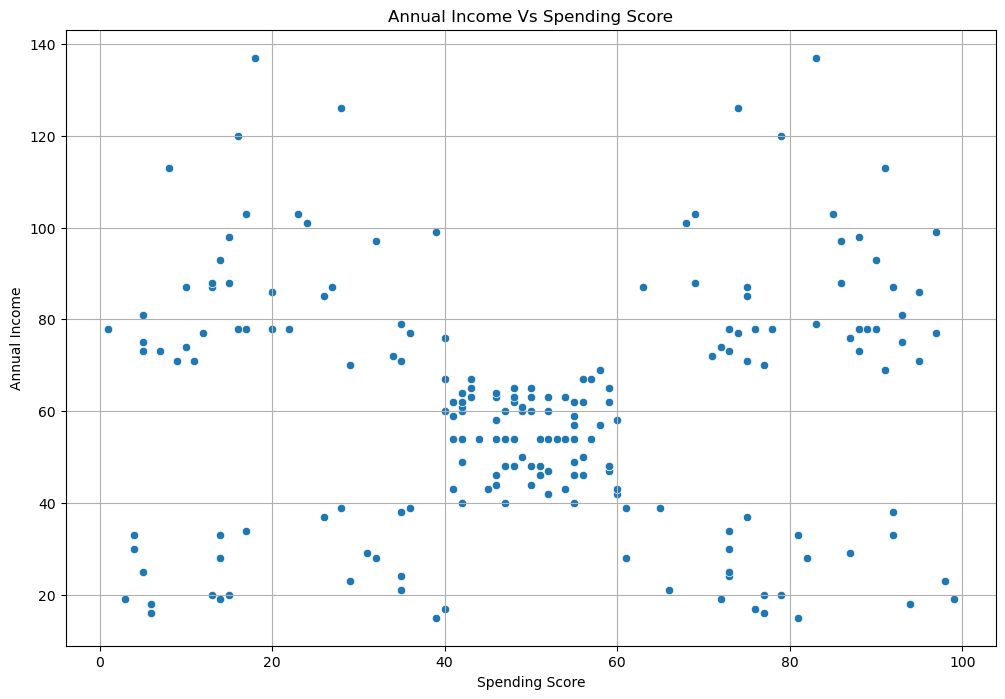

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(clustering_df, x="Spending Score (1-100)", y="Annual Income (k$)")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.title("Annual Income Vs Spending Score")
plt.grid(True)
plt.show()

**We can Observe some clustering from the scatter plot above, this shows there are some common characteristics in our customers spending behaviours and annual incomes**

4.	Determine the Optimal Number of Clusters
    - Use the Elbow Method and Silhouette Score


In [21]:
from sklearn.cluster import KMeans

In [22]:
k_range = range(2, 15)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=1000)
    kmeans.fit(clustering_df)
    inertia = kmeans.inertia_
    inertias.append(inertia)

    print(f"For k= {k}, ineatia is: {inertia}")

C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

For k= 2, ineatia is: 181363.59595959596
For k= 3, ineatia is: 106348.37306211119
For k= 4, ineatia is: 73679.78903948834
For k= 5, ineatia is: 44448.45544793371
For k= 6, ineatia is: 37233.81451071001
For k= 7, ineatia is: 30241.343617936585


C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

For k= 8, ineatia is: 25036.417604033984
For k= 9, ineatia is: 21916.794789843727
For k= 10, ineatia is: 20072.07093940401
For k= 11, ineatia is: 17511.741869266098
For k= 12, ineatia is: 15801.686992795057
For k= 13, ineatia is: 14293.143054331289
For k= 14, ineatia is: 12775.343451156688


C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


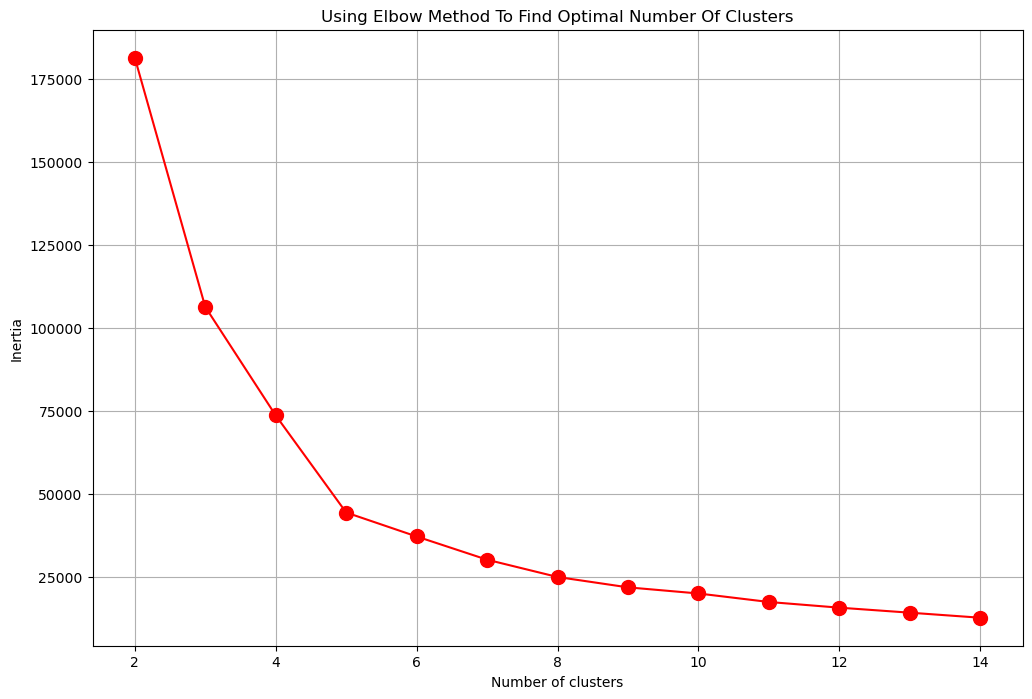

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, inertias, "o-", markersize=10, c="r")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Using Elbow Method To Find Optimal Number Of Clusters")
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
k_range = range(2, 15)
Silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=1000)
    cluster_labels = kmeans.fit_predict(clustering_df)
    silhouette_avg= silhouette_score(clustering_df, cluster_labels)
    Silhouette_scores.append(silhouette_avg)

    print(f"For k= {k}, ineatia is: {silhouette_avg}")

C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

For k= 2, ineatia is: 0.2968969162503008
For k= 3, ineatia is: 0.46761358158775435
For k= 4, ineatia is: 0.4931963109249047
For k= 5, ineatia is: 0.553931997444648
For k= 6, ineatia is: 0.53976103063432
For k= 7, ineatia is: 0.5288104473798049
For k= 8, ineatia is: 0.45481197931195283
For k= 9, ineatia is: 0.4561091950997367
For k= 10, ineatia is: 0.4410568674364981


C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

For k= 11, ineatia is: 0.4489710248005492
For k= 12, ineatia is: 0.42635706431613235
For k= 13, ineatia is: 0.4143358139396936
For k= 14, ineatia is: 0.42179682867112006


C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


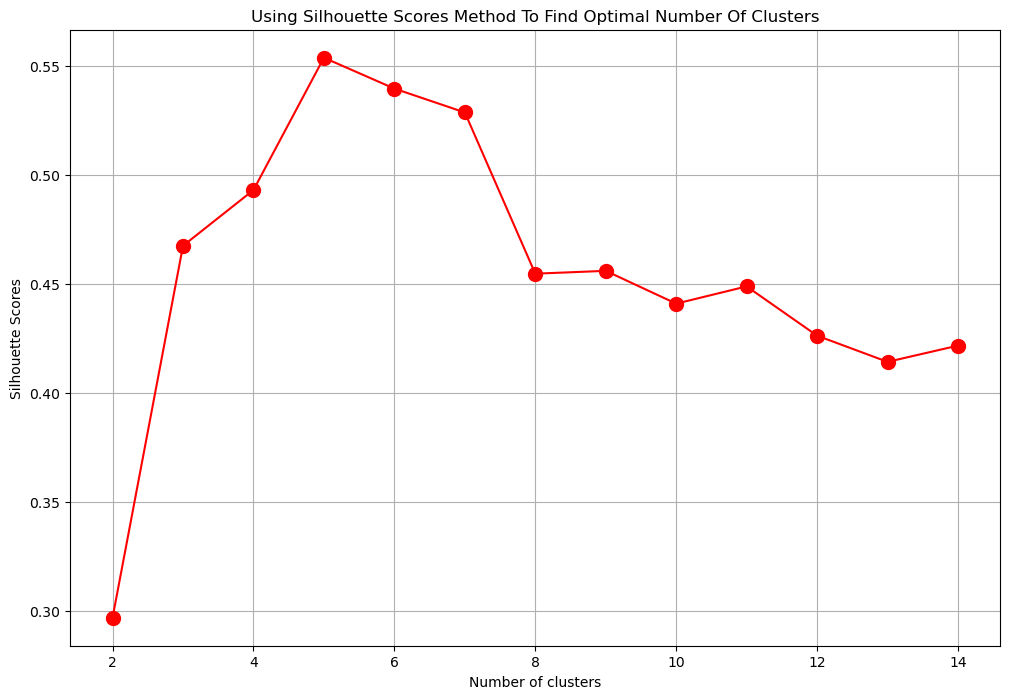

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, Silhouette_scores, "o-", markersize=10, c="r")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Scores")
plt.title("Using Silhouette Scores Method To Find Optimal Number Of Clusters")
plt.grid(True)
plt.show()

**From the inertia and silhouette scores plotted above, the preferable number of clusters is 5**

5.	Build the K-Means Model
    - Pick the optimal number of clusters.
    - Fit K-Means and assign cluster labels.


In [29]:
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=1000)

In [30]:
kmeans_final.fit(clustering_df)

C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,1000
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [31]:
Cluster_labels = kmeans_final.predict(clustering_df)

In [32]:
Cluster_labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [33]:
clustering_df["Predicted Cluster"] = Cluster_labels

C:\Users\yusuf\AppData\Local\Temp\ipykernel_5964\2731092620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df["Predicted Cluster"] = Cluster_labels


In [34]:
clustering_df.head()

,Annual Income (k$),Spending Score (1-100),Predicted Cluster
CustomerID,,,
1,15,39,4
2,15,81,2
3,16,6,4
4,16,77,2
5,17,40,4


In [35]:
clustering_df["Predicted Cluster"].unique()

array([4, 2, 0, 1, 3])

In [36]:
cluster_counts= clustering_df["Predicted Cluster"].value_counts()
cluster_counts

Predicted Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

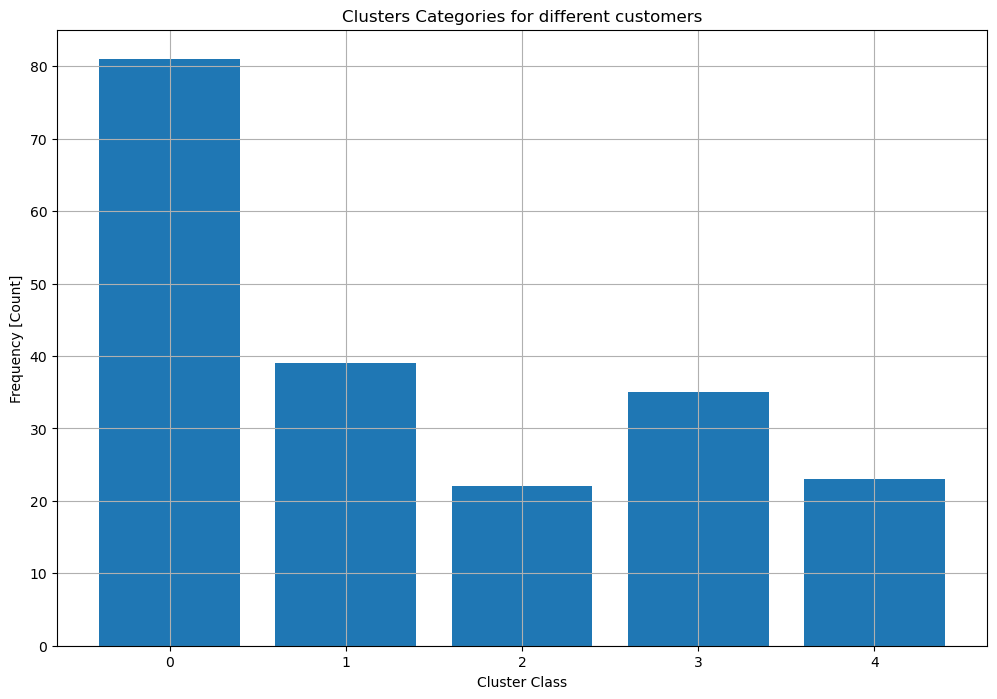

In [37]:
plt.figure(figsize=(12, 8))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel("Cluster Class")
plt.ylabel("Frequency [Count]")
plt.title("Clusters Categories for different customers")
plt.grid(True)
plt.show()

In [38]:
cluster_characteristics = clustering_df.groupby("Predicted Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

In [39]:
cluster_characteristics

,Annual Income (k$),Spending Score (1-100)
Predicted Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


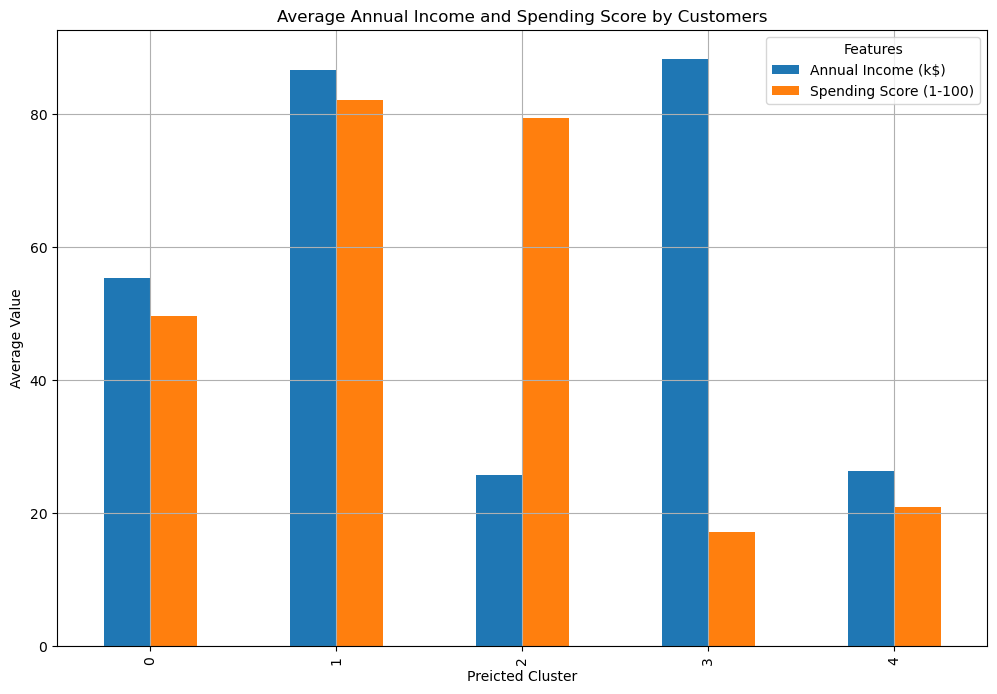

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
cluster_characteristics.plot(kind="bar", ax=ax)
ax.set_xlabel("Preicted Cluster")
ax.set_ylabel("Average Value")
ax.set_title("Average Annual Income and Spending Score by Customers")
ax.legend(title="Features")
plt.grid(True)
plt.show()

## The cluster categories using sum as aggregation function we have clearly show that

  - `Cluster 0`-> Moderate Income Earner, Moderate Spenders
  -  `Cluster 1` -> High Income Earner, High Spenders
  -  `Cluster 2` -> Low Income Earner, High Spenders
  - `Cluster 3` -> High Income Earner, Low Spenders
  -  `Cluster 4` -> Low Income Earner, Low Spenders

In [42]:
centriods = kmeans_final.cluster_centers_
centriods

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

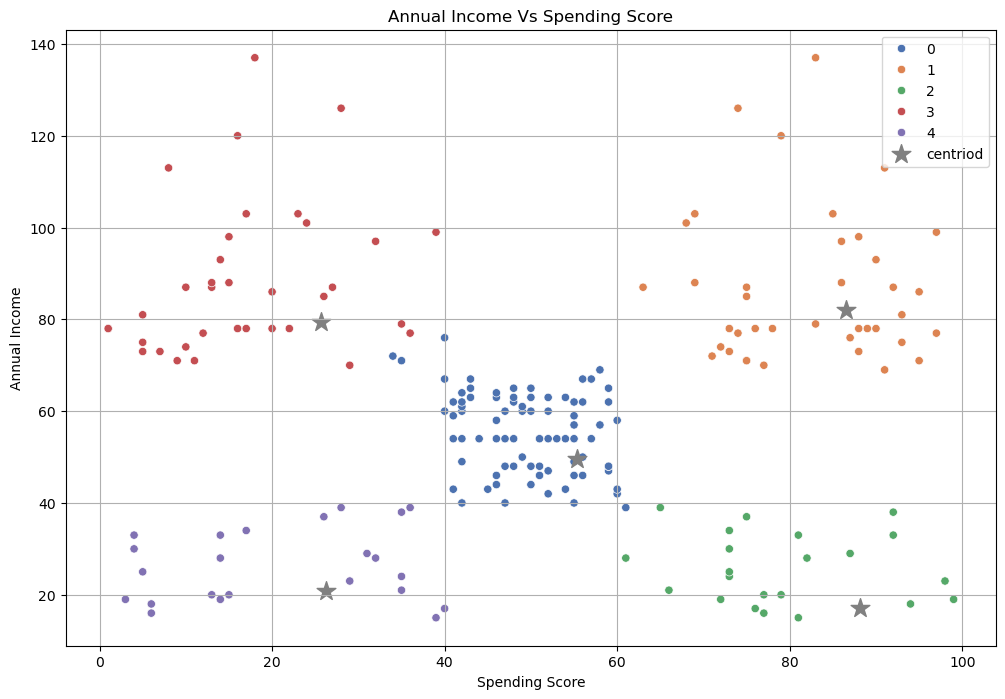

In [43]:
# Plotting Customers Clusters, using their predicted clusters value and showing the centriods
plt.figure(figsize=(12, 8))
sns.scatterplot(clustering_df, x="Spending Score (1-100)", y="Annual Income (k$)", hue="Predicted Cluster", palette="deep")
plt.scatter(x=centriods[:,0], y=centriods[:,1], marker="*", c="grey", s=200, label="centriod")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.title("Annual Income Vs Spending Score")
plt.legend()
plt.grid(True)
plt.show()